# QC Tutorial 6: Qiskit Runitme
Tutorial intended to give an overview on Qiskit Runtime and demonstrate difference between regular circuit and runtime execution
#### Required Packages (Python 3.9):

```markdown
qiskit[visualization]==0.37.0
qiskit-ibm-runtime==0.6.0
qiskit-nature[pyscf]==0.4.0
qiskit-optimization==0.4.0
matplotlib>=3.0.0
notebook
jupyter (windows)
```


### We will review these concepts:
* Introduction to Foundational Quantum Computing Tasks
* Accessing Qiskit Runtime on IBM Quantum
* Variational Quantum Algorithms with Qiskit Runtime: <br> Ground State of a Molecule
* Variational Quantum Algorithms with Qiskit Runtime:<br>Combinatorial Optimization

### Video resource:  https://www.youtube.com/watch?v=iZsHzVvAGLM


# Part 1: Introduction to Foundational Quantum Computing Tasks

1. Sampling from quantum circuits (plus an exercise)

2. Estimating expectation values of observables (plus an exercise)

# 1. Sampling from quantum circuits

## ! EXERCISE !

**Sample from a circuit with entangling gates.**

1. Create a circuit with both single and two-qubit entangling gates of your choosing (check out the [Qiskit Circuit Library of standard gates](https://qiskit.org/documentation/apidoc/circuit_library.html)). For example, perhaps you might build a [Bell state](https://en.wikipedia.org/wiki/Bell_state) or a [GHZ state](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state).
2. Measure all qubits in the computational basis
3. Run the circuit on the `qasm_simulator` backend
4. Plot a histogram of measurement counts (you can use Qiskit's `plot_histogram` functionality documented [here](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_histogram.html))

Is the output what you expected?

### A Solution...

        ┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2 


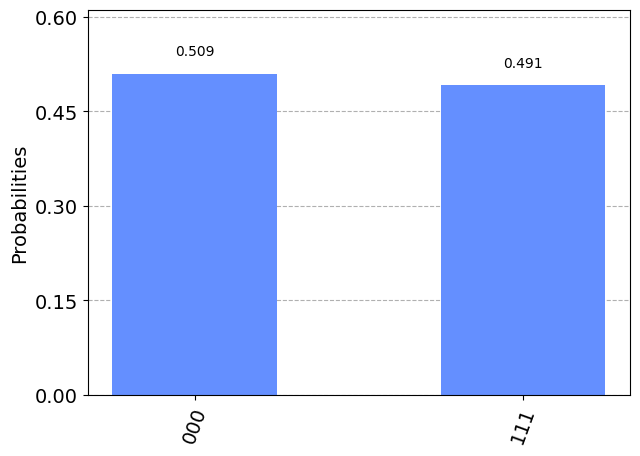

In [2]:
# import functionality from qiskit for building and running circuits
from qiskit import QuantumCircuit, BasicAer, transpile

# here we'll create a GHZ state
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cnot(0,1)
circuit.cnot(1,2)
circuit.measure_all()

print(circuit.draw())

# select a quantum backend and run the circuit
backend = BasicAer.get_backend('qasm_simulator')
shots = 2**13

job = backend.run(transpile(circuit, backend), shots=shots)
result = job.result()
counts = result.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)

# 2. Estimating expectation values

### Example: Pauli $Z$ operator

Recall that $Z = |0\rangle\langle0| - |1\rangle\langle1|$

This means we can write the expectation of $Z$ as:

\begin{equation}
\begin{split}
   \langle\psi|Z|\psi\rangle & = \langle\psi|0\rangle\langle0|\psi\rangle-\langle\psi|1\rangle\langle1|\psi\rangle \\
                             & = |\langle0|\psi\rangle|^2 - |\langle1|\psi\rangle|^2 \\
                             & = p(0) - p(1)
\end{split}
\end{equation}

Therefore, to estimate the expectation value of $Z$, we:

1. Prepare a circuit representing $|\psi\rangle$
2. Measure in the computational ($Z$) basis to get the probabilities $|\langle0|\psi\rangle|^2, |\langle1|\psi\rangle|^2$
3. Subtract the probability to measure "1" from "0"

## ! EXERCISE !


**Compute the expectation value of the Pauli $X$ and $Y$ operators in the states $|1\rangle, |+\rangle$.**

Hint: these operators can be related to $Z$ via the following transformations: $HZH=X$ and $SHZHS^\dagger=Y$. How does this modify the math we saw above for the expectation value (and hence the circuit implementation)?

Check out [this chapter of the Qiskit Textbook for info about using single-qubit gates](https://qiskit.org/textbook/ch-states/single-qubit-gates.html).

### A Solution...

Let's start with $X$ and modify the math for the expectation value.

$$
\begin{split}
\langle\psi|X|\psi\rangle & = \langle\psi|HZH|\psi\rangle \\
                          & = \langle\psi H|0\rangle\langle0|H\psi\rangle-\langle\psi H|1\rangle\langle1|H\psi\rangle\\
                          & = |\langle0|H\psi\rangle|^2 - |\langle1|H\psi\rangle|^2
\end{split}
$$

Therefore, to estimate this expectation value, we apply a post-rotation ($H$) to the circuit $\psi$ and then measure in the computational basis.

Similarly for the expectation value of $Y$:

$$
\begin{split}
\langle\psi|Y|\psi\rangle & = \langle\psi|SHZHS^\dagger|\psi\rangle \\
                          & = \langle\psi SH|0\rangle\langle0|HS^\dagger\psi\rangle-\langle\psi SH|1\rangle\langle1|HS^\dagger\psi\rangle\\
                          & = |\langle0|HS^\dagger\psi\rangle|^2 - |\langle1|HS^\dagger\psi\rangle|^2
\end{split}
$$
In this case, we add the post-rotation $HS^\dagger$ to the circuit.

In [3]:
# defining the state |1>
import numpy as np
a = 0
b = 1
state = np.array([a,b])
norm = np.linalg.norm(state)
normalized_state_ONE = state/norm

print(normalized_state_ONE)

[0. 1.]


In [4]:
# define the state |+>
a = 0.70710678 # 1/sqrt(2)
b = 0.70710678
state = np.array([a,b])
norm = np.linalg.norm(state)
normalized_state_PLUS = state/norm

print(normalized_state_PLUS)

[0.70710678 0.70710678]


**Let's look at the eigenstate for the $X$ gate**

In [5]:
# define the Pauli X operator
x = np.array([[0, 1],
             [1, 0]])


Eigensystem of X:
[-1.  1.]
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


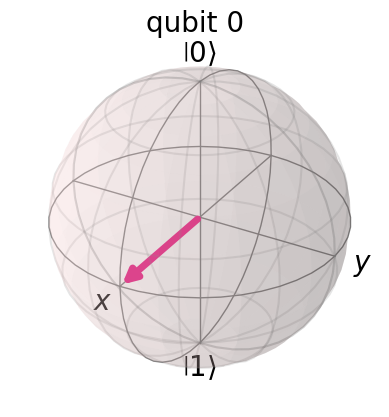

In [6]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
x_eigenvals, x_eigenvecs = np.linalg.eigh(x)

print('\nEigensystem of X:')
print(x_eigenvals)
print(x_eigenvecs)

plot_bloch_multivector(x_eigenvecs[:,1])

**To measure $\langle1|X|1\rangle$, add a post rotation ($H$)**

In [7]:
circuit = QuantumCircuit(1)
circuit.initialize(normalized_state_ONE)
circuit.h(0)
circuit.measure_all()
print(circuit)

        ┌─────────────────┐┌───┐ ░ ┌─┐
     q: ┤ Initialize(0,1) ├┤ H ├─░─┤M├
        └─────────────────┘└───┘ ░ └╥┘
meas: 1/════════════════════════════╩═
                                    0 


In [8]:
job = backend.run(transpile(circuit, backend), shots=shots)
result = job.result()

counts = result.get_counts()
print(counts)

expval = (counts.get('0',0)-counts.get('1',0)) / shots
print('expectation value: {}'.format(expval))

{'1': 4075, '0': 4117}
expectation value: 0.005126953125


This makes sense because $\langle1|X|1\rangle = |\langle0|H|1\rangle|^2-|\langle1|H|1\rangle|^2 = 1/2-1/2=0$. Note also, that the state $|1\rangle$ is an equal superposition of the two eigenstates of the operator $X$: $|1\rangle = 1/\sqrt(2) (|+\rangle - |-\rangle)$, so we expect the expectation value to vanish.

**To measure $\langle+|X|+\rangle$, add a post rotation ($H$)**

In [9]:
circuit = QuantumCircuit(1)
circuit.initialize(normalized_state_PLUS)
circuit.h(0)
circuit.measure_all()
print(circuit)

        ┌─────────────────────────────┐┌───┐ ░ ┌─┐
     q: ┤ Initialize(0.70711,0.70711) ├┤ H ├─░─┤M├
        └─────────────────────────────┘└───┘ ░ └╥┘
meas: 1/════════════════════════════════════════╩═
                                                0 


In [10]:
job = backend.run(transpile(circuit, backend), shots=shots)
result = job.result()

counts = result.get_counts()
print(counts)

expval = (counts.get('0',0)-counts.get('1',0)) / shots
print('expectation value: {}'.format(expval))

{'0': 8192}
expectation value: 1.0


This makes sense because $\langle+|X|+\rangle = |\langle0|H|+\rangle|^2-|\langle1|H|+\rangle|^2 = |\langle0|0\rangle|^2-|\langle1|0\rangle|^2 = 1-0=1$. And also because the state $|+\rangle$ is an _eigenstate_ of the operator $X$ with eigenvalue $1$.

**Now, repeat this for the $Y$ gate, adding in the correct post rotation ($HS^\dagger$)**

In [11]:
circuit = QuantumCircuit(1)
circuit.initialize(normalized_state_ONE)
circuit.sdg(0)
circuit.h(0)
circuit.measure_all()
print(circuit)

job = backend.run(transpile(circuit, backend), shots=shots)
result = job.result()
counts = result.get_counts()
print(counts)
expval = (counts.get('0',0)-counts.get('1',0)) / shots
print('expectation value: {}'.format(expval))

        ┌─────────────────┐┌─────┐┌───┐ ░ ┌─┐
     q: ┤ Initialize(0,1) ├┤ Sdg ├┤ H ├─░─┤M├
        └─────────────────┘└─────┘└───┘ ░ └╥┘
meas: 1/═══════════════════════════════════╩═
                                           0 
{'0': 4134, '1': 4058}
expectation value: 0.00927734375


For similar reasons as with $X$, we expect this to vanish because $|1\rangle$ is an equal superposition of the eigenstates of the operator $Y$.

In [12]:
circuit = QuantumCircuit(1)
circuit.initialize(normalized_state_PLUS)
circuit.sdg(0)
circuit.h(0)
circuit.measure_all()
print(circuit)

job = backend.run(transpile(circuit, backend), shots=shots)
result = job.result()
counts = result.get_counts()
print(counts)
expval = (counts.get('0',0)-counts.get('1',0)) / shots
print('expectation value: {}'.format(expval))

        ┌─────────────────────────────┐┌─────┐┌───┐ ░ ┌─┐
     q: ┤ Initialize(0.70711,0.70711) ├┤ Sdg ├┤ H ├─░─┤M├
        └─────────────────────────────┘└─────┘└───┘ ░ └╥┘
meas: 1/═══════════════════════════════════════════════╩═
                                                       0 
{'1': 4128, '0': 4064}
expectation value: -0.0078125


In this case also, the expectation value vanishes because $|+\rangle$ is an equal superposition of the eigenstates of the operator $Y$.

# ! Exercise !

1. Open a Qiskit Runtime session with the `Estimator` context manager.
2. Make multiple requests to the `estimator` primitive within the session.
    * The parameter values of a request is based on the previous one.
    * The loop ends when a target is achieved.


### A Solution...

In the previous exercise, we computed the expectation values of the Pauli $X$ and $Y$ operators in the states $|1\rangle, |+\rangle$.

Here we will do the same but with a small twist. We will prepare a circuit in the $|1\rangle$ state and use Pauli $X$ operator if the expectation value is >0; Pauli $Y$ if the expectation value is <0. Since the expectation value should vanish, we set a target of 0.01 (not 0 because it's never _exactly_ 50/50).

In [13]:
# Authenticate with the server.
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum")

ImportError: cannot import name 'COMMON_SAFE_ASCII_CHARACTERS' from 'charset_normalizer.constant' (C:\Users\Betis\.conda\envs\QC-KSU\lib\site-packages\charset_normalizer\constant.py)

In [14]:
# Prepare the circuit.
from qiskit import QuantumCircuit

qc1 = QuantumCircuit(1, 1)
qc1.x(0)
qc1.measure_all()

In [15]:
# Prepare the operators.
from qiskit.quantum_info import SparsePauliOp

x_op = SparsePauliOp.from_list([("X", 1)])
y_op = SparsePauliOp.from_list([("Y", 1)])

In [22]:
# Get the expectation values.
from qiskit_ibm_runtime import Estimator

with Estimator(
    circuits=[qc1],
    observables=[x_op, y_op],
    service=service,
    options={ "backend": "ibmq_qasm_simulator" }
) as estimator:

    target = 0.01
    exp_val = estimator(circuits=[0], observables=[x_op]).values[0]
    print(f"Expectation value: {exp_val}")

    while abs(exp_val) > target:
        op = x_op if exp_val > 0 else y_op
        exp_val = estimator(circuits=[0], observables=[op]).values[0]
        print(f"Expectation value: {exp_val}")

AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

# Variational Quantum Algorithms with Qiskit Runtime: <br> Ground State of a Molecule

In this exercise, use Qiskit Runtime to find the approximate ground state energy of the $H_2$ molecule, with interatomic distance 0.72 angstroms.

_Hints_

- Start with the [notebook implementing a generic VQA](Part3_VQA_Generic.ipynb) and modify the input problem to accept an electronic structure problem.
<br>

- For help on setting up an electronic structure problem for $H_2$, check out [this tutorial from Qiskit Nature](https://qiskit.org/documentation/nature/tutorials/01_electronic_structure.html).
<br>

- It's recommended you use pyscf for the [`ElectronicStructureMoleculeDriver`](https://qiskit.org/documentation/nature/stubs/qiskit_nature.drivers.second_quantization.ElectronicStructureMoleculeDriver.html) and [`ParityMapper` for the qubit conversion](https://qiskit.org/documentation/nature/stubs/qiskit_nature.mappers.second_quantization.ParityMapper.html) (to reduce the system size down to 2 qubits).
<br>

- You can test different classical optimizers (e.g., [`NELDER_MEAD`](https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.NELDER_MEAD.html)) and circuit ansatzae (e.g., [`RealAmplitudes`](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RealAmplitudes.html))
<br>

- Once you get the expectation value from the qubit Hamiltonian, add back in the nuclear repulsion energy using the `total_energies` method of the `ElectronicStructureResult` documented [here](https://qiskit.org/documentation/nature/stubs/qiskit_nature.results.ElectronicStructureResult.total_energies.html#qiskit_nature.results.ElectronicStructureResult.total_energies).

## A Solution...

**Define the H2 molecule and the classical driver**

In [23]:
from qiskit_nature.drivers import Molecule
from qiskit_nature.drivers.second_quantization import ElectronicStructureDriverType, ElectronicStructureMoleculeDriver

dist = 0.72
molecule = Molecule(geometry=[['H', [0., 0., 0.]], ['H', [0., 0., dist]]])
driver = ElectronicStructureMoleculeDriver(molecule, basis='sto3g', \
                                           driver_type=ElectronicStructureDriverType.PYSCF)

print(molecule)

Molecule:
	Multiplicity: 1
	Charge: 0
	Unit: Angstrom
	Geometry:
		H	[0.0, 0.0, 0.0]
		H	[0.0, 0.0, 0.72]


**Set up the electronic structure problem and build the second quantized hamiltonian**

In [24]:
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem

es_problem = ElectronicStructureProblem(driver)
second_q_ops = es_problem.second_q_ops()
print(second_q_ops[0])

MissingOptionalLibraryError: "The 'pyscf' library is required to use 'PySCFDriver'.  See https://pyscf.org/install.html."

**Convert the second quantized hamiltonian to a qubit hamiltonian**

In [25]:
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import ParityMapper

qubit_converter = QubitConverter(ParityMapper(), two_qubit_reduction=True)
hamiltonian = qubit_converter.convert(second_q_ops[0], num_particles=es_problem.num_particles)
print(hamiltonian)

NameError: name 'second_q_ops' is not defined

**Let's solve this problem exactly using a numpy minimum eigensolver**

In [26]:
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit.algorithms import MinimumEigensolverResult

# Generate the exact solution
sol = MinimumEigensolverResult()
sol.eigenvalue = NumPyMinimumEigensolver().compute_minimum_eigenvalue(hamiltonian).eigenvalue
exact_solution = es_problem.interpret(sol).total_energies[0]

print('exact_solution:\n{}'.format(exact_solution))

NameError: name 'hamiltonian' is not defined

**Before we can use Qiskit Runtime to solve, we need to convert the hamiltonian into an [opflow op](https://qiskit.org/documentation/apidoc/opflow.html)**

In [27]:
from qiskit.opflow import TaperedPauliSumOp
import numpy as np

ops = []
h = hamiltonian.primitive
h.coeffs = np.real(hamiltonian.coeffs)
ops.append(TaperedPauliSumOp(h, hamiltonian.z2_symmetries))

NameError: name 'hamiltonian' is not defined

**Let's start the qiskit runtime service and define our problem inputs**

We'll choose a backend, a classical optimizer, and a circuit ansatz for the ground state.

In [28]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator
service = QiskitRuntimeService()
options = {"backend" : "ibmq_qasm_simulator"}

from qiskit.algorithms.optimizers import NELDER_MEAD
from qiskit.circuit.library import RealAmplitudes
circuit = RealAmplitudes(num_qubits=hamiltonian.num_qubits, reps=2)

AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

**This is what our circuit looks like**

In [29]:
circuit.decompose().draw()

┌────────────────────────────────────┐┌──────────┐┌─────────┐ ░ »
     q: ─|0>─┤ State Preparation(0.70711,0.70711) ├┤ U1(-π/2) ├┤ U2(0,π) ├─░─»
             └────────────────────────────────────┘└──────────┘└─────────┘ ░ »
meas: 1/═════════════════════════════════════════════════════════════════════»
                                                                             »
«        ┌─┐
«     q: ┤M├
«        └╥┘
«meas: 1/═╩═
«         0

**Now, we can use the Estimator code from the generic VQA example**

In [30]:
convergence = []

with Estimator(
    circuits=circuit,
    observables=ops,
    options=options,
    service=service
) as estimator:

    def evaluate_expectation(x):
        x = list(x)
        results = estimator(circuits=[0], observables=[0], parameter_values=[x]).values[0]
        return np.real(results)

    def callback(fx):
        expval = evaluate_expectation(fx)
        print('expval: {}'.format(expval))
        convergence.append(expval)

    np.random.seed(1)
    initial_point = np.random.uniform(-np.pi, np.pi, len(circuit.parameters))
    optimizer = NELDER_MEAD(40, callback=callback)
    result = optimizer.minimize(fun=evaluate_expectation, x0=initial_point)


NameError: name 'Estimator' is not defined

**We'll add the contribution of the nuclear repulsion energy from the driver to get the total energy**

In [31]:
total_energy = []
for i in range(len(convergence)):
    sol = MinimumEigensolverResult()
    sol.eigenvalue = convergence[i]
    sol = es_problem.interpret(sol).total_energies[0]
    total_energy.append(sol)

print(total_energy)

[]


**And, finally, let's plot the convergence of our algorithm**

NameError: name 'exact_solution' is not defined

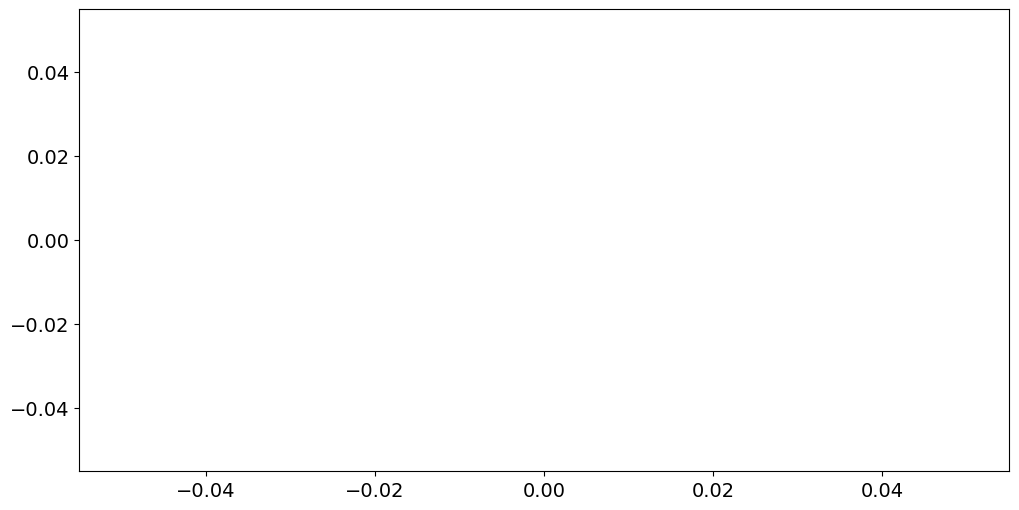

In [32]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14

plt.figure(figsize=(12, 6))
plt.plot(total_energy, label="Estimator VQE")
plt.axhline(y=exact_solution, color="tab:red", ls="--", label="Target")

plt.legend(loc="best")
plt.xlabel("Iteration")
plt.ylabel("Energy [H]")
plt.title("VQE energy")
plt.show()

# Variational Quantum Algorithms with Qiskit Runtime: <br>Generic Example

In this notebook, we will work through a simple example of building variational quantum algorithms using Qiskit Runtime.

1. Define a Hamiltonian, representing system of interest, from Pauli operators
2. Select a quantum circuit representing the ground state ansatz
3. Construct an optimization loop to minimize the energy (expectation value of the Hamiltonian)
4. Retrieve the result (approximate ground state energy)


## 1. Define a (very simple) Hamiltonian

In [33]:
from qiskit.quantum_info import SparsePauliOp

op = SparsePauliOp.from_list([("ZZII", 1)])
num_qubits = op.num_qubits
ops = [op]

print(op)

SparsePauliOp(['ZZII'],
              coeffs=[1.+0.j])


#### This Hamiltonian has a minimum energy of $-1$ (which you can see from eigenvalues of $Z$)

In [34]:
target_energy = -1

## 2. Choose a ground state ansatz

We'll use a parametrized circuit from the Qiskit Circuit Library.<br>
[`EfficientSU2` yields short-depth circuits](https://qiskit.org/documentation/stubs/qiskit.circuit.library.EfficientSU2.html) well suited for noisy quantum hardware.

In [35]:
from qiskit.circuit.library import EfficientSU2
circuit = EfficientSU2(num_qubits, reps=1, entanglement="linear", insert_barriers=True)

circuit.decompose().draw()

┌──────────┐┌──────────┐ ░                 ░  ┌──────────┐┌───────────┐
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[4]) ├─░───■─────────────░──┤ Ry(θ[8]) ├┤ Rz(θ[12]) ├
     ├──────────┤├──────────┤ ░ ┌─┴─┐           ░  ├──────────┤├───────────┤
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[5]) ├─░─┤ X ├──■────────░──┤ Ry(θ[9]) ├┤ Rz(θ[13]) ├
     ├──────────┤├──────────┤ ░ └───┘┌─┴─┐      ░ ┌┴──────────┤├───────────┤
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[6]) ├─░──────┤ X ├──■───░─┤ Ry(θ[10]) ├┤ Rz(θ[14]) ├
     ├──────────┤├──────────┤ ░      └───┘┌─┴─┐ ░ ├───────────┤├───────────┤
q_3: ┤ Ry(θ[3]) ├┤ Rz(θ[7]) ├─░───────────┤ X ├─░─┤ Ry(θ[11]) ├┤ Rz(θ[15]) ├
     └──────────┘└──────────┘ ░           └───┘ ░ └───────────┘└───────────┘

## 3. Construct an optimization loop to minimize energy

- Since we are interested in minimum energy (expval of Hamiltonian), we'll use the **Estimator primitive**.
- We'll choose a **classical optimizer** to update the circuit ansatz parameters and configure the settings of the Qiskit Runtime Service.
- We'll define a **callback function** to store extra info about the optimization.

In [36]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator
from qiskit.algorithms.optimizers import SPSA
import numpy as np

service = QiskitRuntimeService()
options = {"backend" : "ibmq_qasm_simulator"}

# Callback: number of function evals, parameters, function value, stepsize, whether step was accepted
history = {"nfevs": [], "points": [], "fvals": [], "updates": [], "accepted": []}

AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

#### Now, we use the Estimator primitive:

In [37]:
with Estimator(circuits=circuit, observables=ops, options=options, service=service) as estimator:

    def evaluate_expectation(x):
        x = list(x)
        results = estimator(circuits=[0], observables=[0], parameter_values=[x]).values[0]
        return np.real(results)

    def callback(nfev, point, fval, update, accepted):
        print('expectation value: {}'.format(fval))
        history["nfevs"].append(nfev)
        history["points"].append(point)
        history["fvals"].append(fval)
        history["updates"].append(update)
        history["accepted"].append(accepted)

    initial_point = np.random.random(circuit.num_parameters)
    optimizer = SPSA(20, callback=callback)
    result = optimizer.minimize(fun=evaluate_expectation, x0=initial_point)


NameError: name 'Estimator' is not defined

#### Our algorithm reached the target energy:

In [38]:
history["fvals"][-1] - target_energy

#### We can get other information about the optimization, such as the final circuit parameters:

In [39]:
print('optimal point:\n{}'.format(result.x))

AttributeError: Attribute x is not defined

# Variational Quantum Algorithms with Qiskit Runtime:<br>Combinatorial Optimization

In this exercise, use Qiskit Runtime to find the approximate solution to a combinatorial optimization problem.

For example, you could either use a pre-generated instance of a 4-node maxcut graph with weight matrix given by

```
w = [[0. 1. 1. 1.]
     [1. 0. 1. 0.]
     [1. 1. 0. 1.]
     [1. 0. 1. 0.]]
```

Or, start with the below QUBO with binary variables `x`, `y`, and `z`:

```
Minimize:
  x - 2 y + 3 z + [ 2 x*y - 2 x*z + 4 y*z ]/2
```

_Hints_

- Start with the [notebook implementing a generic VQA with Qiskit Runtime](Part3_VQA_Generic.ipynb) and modify the input problem to be a combinatorial optimization problem.
<br>

- If you choose to solve the QUBO, check out this tutorial from Qiskit Optimization on [how to construct Quadratic Programs](https://qiskit.org/documentation/optimization/tutorials/01_quadratic_program.html).
<br>

- If you choose to solve the maxcut instance, check out this tutorial for [setting up a maxcut problem and mapping to an Ising hamiltonian](https://qiskit.org/documentation/optimization/tutorials/06_examples_max_cut_and_tsp.html).
<br>

- For either problem, you can use the [`Estimator` primitive](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials/how-to-getting-started-with-estimator.html) to minimize the energy of the problem. Then, you can use the [`Sampler` primitive](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials/how-to-getting-started-with-sampler.html) to get the bitstrings from the approximate ground state. From these bitstrings, you can compute the objective values and probabilities. Finally, the solution is given by the bitstring that yields the best objective function value.
<br>

- For your choice of circuit ansatz, you might start with the [`TwoLocal` circuit](https://qiskit.org/documentation/stubs/qiskit.circuit.library.TwoLocal.html) or [`RealAmplitudes`](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RealAmplitudes.html), but feel free to check out the other [options in the Qiskit Circuit Library](https://qiskit.org/documentation/apidoc/circuit_library.html#n-local-circuits).
<br>

- The [SPSA optimizer](https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.SPSA.html) is a good choice to try for the classical optimizer. If you choose this, define your callback function with the following arguments:

```
# save outputs of SPSA to a dictionary with 5 keys:
history = {"nfevs": [], "points": [], "fvals": [], "updates": [], "accepted": []}

def callback(nfev, point, fval, update, accepted):
    print('expectation value: {}'.format(fval))
    history["nfevs"].append(nfev)
    history["points"].append(point)
    history["fvals"].append(fval)
    history["updates"].append(update)
    history["accepted"].append(accepted)
```

## A solution for the 4-node maxcut graph

#### Set up the quadratic program from the weight matrix of the maxcut instance

In [40]:
import numpy as np
w = np.array([[0., 1., 1., 1.],
     [1., 0., 1., 0.],
     [1., 1., 0., 1.],
     [1., 0., 1., 0.]])

from qiskit_optimization.applications import Maxcut
max_cut = Maxcut(w)
qp = max_cut.to_quadratic_program()
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max-cut

Maximize
 obj: 3 x_0 + 2 x_1 + 3 x_2 + 2 x_3 + [ - 4 x_0*x_1 - 4 x_0*x_2 - 4 x_0*x_3
      - 4 x_1*x_2 - 4 x_2*x_3 ]/2
Subject To

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1

Binaries
 x_0 x_1 x_2 x_3
End



#### Convert the quadratic program to an Ising hamiltonian

In [41]:
qubitOp, offset = qp.to_ising()
num_qubits = qubitOp.num_qubits
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: -2.5
Ising Hamiltonian:
0.5 * IIZZ
+ 0.5 * IZIZ
+ 0.5 * IZZI
+ 0.5 * ZIIZ
+ 0.5 * ZZII


#### Solve for the exact solution using the classical eigensolver

In [42]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import NumPyMinimumEigensolver
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qp)
print(result)

fval=4.0, x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, status=SUCCESS


#### To solve with Qiskit Runtime, convert the Ising hamiltonian into an opflow op

In [43]:
from qiskit.opflow import PauliSumOp
import numpy as np

ops = []
h = qubitOp.primitive
h.coeffs = np.real(qubitOp.coeffs)
ops.append(PauliSumOp(h))
print(ops)

[PauliSumOp(SparsePauliOp(['IIZZ', 'IZIZ', 'IZZI', 'ZIIZ', 'ZZII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j]), coeff=1.0)]


#### Set up the qiskit runtime service and minimize the energy using the `Estimator` primitive

In [44]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
options = {"backend" : "ibmq_qasm_simulator"}

from qiskit.circuit.library import TwoLocal
circuit = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=5, entanglement="linear")
circuit.decompose().draw(fold=300)

AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

In [45]:
from qiskit_ibm_runtime import Estimator
from qiskit.algorithms.optimizers import SPSA

history = {"nfevs": [], "points": [], "fvals": [], "updates": [], "accepted": []}

with Estimator(
    circuits=circuit,
    observables=ops,
    options=options,
    service=service
) as estimator:

    def evaluate_expectation(x):
        x = list(x)
        results = estimator(circuits=[0], observables=[0], parameter_values=[x]).values[0]
        return np.real(results)

    def callback(nfev, point, fval, update, accepted):
        print('expectation value: {}'.format(fval))
        history["nfevs"].append(nfev)
        history["points"].append(point)
        history["fvals"].append(fval)
        history["updates"].append(update)
        history["accepted"].append(accepted)

    np.random.seed(1)
    initial_point = np.random.uniform(-np.pi, np.pi, len(circuit.parameters))
    optimizer = SPSA(50, callback=callback)
    result = optimizer.minimize(fun=evaluate_expectation, x0=initial_point)


AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

In [46]:
print('optimized circuit parameters:\n{}'.format(result.x))

optimized circuit parameters:
[1. 0. 1. 0.]


#### Use the `Sampler` primitive to get bitstrings from the approx ground state

In [47]:
from qiskit_ibm_runtime import Sampler

circut = circuit.measure_all()
with Sampler(
    circuits=circuit,
    options=options,
    service=service
) as sampler:
    sampler_result = sampler(circuits=[0], parameter_values=[result.x], shots=8000)
    print(result)

AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

In [48]:
bitstrings = sampler_result.quasi_dists[0] # get the dictionary of bitstring counts

NameError: name 'sampler_result' is not defined

#### Plot the convergence and distribution of sampled bitstrings

Text(0, 0.5, 'Probability')

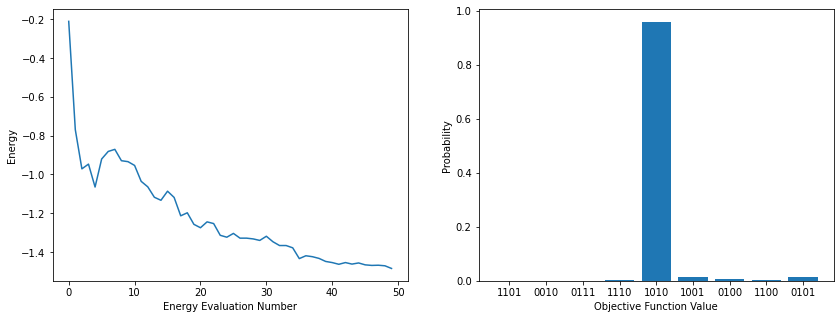

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(history['fvals'])
axs[1].bar(list(bitstrings.keys()), list(bitstrings.values()))
axs[0].set_xlabel("Energy Evaluation Number")
axs[0].set_ylabel("Energy")
axs[1].set_xlabel("Objective Function Value")
axs[1].set_ylabel("Probability")

#### From the bitstrings sampled, compute the corresponding objective function value, and then sort

In [49]:
samples = []
for x, probability in bitstrings.items():

    x = list(map(int, x)) # convert bitstring to list
    status = qp.is_feasible(x)
    fval = qp.objective.evaluate(x)

    samples.append((x, fval, probability, status))

sorted_samples = sorted(
    samples,
    key=lambda v: (1-v[3], qp.objective.sense.value * v[1]) # feasible: 0; infeasible: 1
)

print('\nsorted')
for sample in sorted_samples:
    print(sample)

NameError: name 'bitstrings' is not defined

#### Get the solution with best objective function value

In [50]:
best = sorted_samples[0]
print('optimal value: {}'.format(best[0]))
print('optimal function value: {}'.format(best[1]))
print('probability of optimal value: {}'.format(best[2]))

NameError: name 'sorted_samples' is not defined

## A solution for the QUBO problem

#### Set up the quadratic program from the description of the QUBO problem

In [51]:
from qiskit_optimization import QuadraticProgram

qp = QuadraticProgram()
qp.binary_var("x")
qp.binary_var("y")
qp.binary_var("z")
qp.minimize(linear=[1, -2, 3], quadratic={("x", "y"): 1, ("x", "z"): -1, ("y", "z"): 2})
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Minimize
 obj: x - 2 y + 3 z + [ 2 x*y - 2 x*z + 4 y*z ]/2
Subject To

Bounds
 0 <= x <= 1
 0 <= y <= 1
 0 <= z <= 1

Binaries
 x y z
End



#### Convert the quadratic program to an Ising hamiltonian

In [52]:
qubitOp, offset = qp.to_ising()
num_qubits = qubitOp.num_qubits
print("offset: {}".format(offset))
print("operator:\n{}".format(qubitOp))

offset: 1.5
operator:
-0.5 * IIZ
+ 0.25 * IZI
- 1.75 * ZII
+ 0.25 * IZZ
- 0.25 * ZIZ
+ 0.5 * ZZI


#### Solve for the exact solution using the classical eigensolver

In [23]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import NumPyMinimumEigensolver
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qp)
print(result)

fval=-2.0, x=0.0, y=1.0, z=0.0, status=SUCCESS


#### To solve with Qiskit Runtime, convert the Ising hamiltonian into an opflow op

In [53]:
from qiskit.opflow import PauliSumOp
import numpy as np

ops = []
h = qubitOp.primitive
h.coeffs = np.real(qubitOp.coeffs)
ops.append(PauliSumOp(h))
print(ops)

[PauliSumOp(SparsePauliOp(['IIZ', 'IZI', 'ZII', 'IZZ', 'ZIZ', 'ZZI'],
              coeffs=[-0.5 +0.j,  0.25+0.j, -1.75+0.j,  0.25+0.j, -0.25+0.j,  0.5 +0.j]), coeff=1.0)]


#### Set up the qiskit runtime service and minimize the energy using the `Estimator` primitive

In [31]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
options = {"backend" : "ibmq_qasm_simulator"}

from qiskit.circuit.library import RealAmplitudes
circuit = RealAmplitudes(num_qubits=num_qubits, reps=2)

circuit.decompose().draw(fold=100)

┌──────────┐          ┌──────────┐                      ┌──────────┐            
q_0: ┤ Ry(θ[0]) ├──■────■──┤ Ry(θ[3]) ├──────────────■────■──┤ Ry(θ[6]) ├────────────
     ├──────────┤┌─┴─┐  │  └──────────┘┌──────────┐┌─┴─┐  │  └──────────┘┌──────────┐
q_1: ┤ Ry(θ[1]) ├┤ X ├──┼───────■──────┤ Ry(θ[4]) ├┤ X ├──┼───────■──────┤ Ry(θ[7]) ├
     ├──────────┤└───┘┌─┴─┐   ┌─┴─┐    ├──────────┤└───┘┌─┴─┐   ┌─┴─┐    ├──────────┤
q_2: ┤ Ry(θ[2]) ├─────┤ X ├───┤ X ├────┤ Ry(θ[5]) ├─────┤ X ├───┤ X ├────┤ Ry(θ[8]) ├
     └──────────┘     └───┘   └───┘    └──────────┘     └───┘   └───┘    └──────────┘

In [26]:
from qiskit_ibm_runtime import Estimator
from qiskit.algorithms.optimizers import SPSA

history = {"nfevs": [], "points": [], "fvals": [], "updates": [], "accepted": []}

with Estimator(
    circuits=circuit,
    observables=ops,
    options=options,
    service=service
) as estimator:

    def evaluate_expectation(x):
        x = list(x)
        results = estimator(circuits=[0], observables=[0], parameter_values=[x]).values[0]
        return np.real(results)

    def callback(nfev, point, fval, update, accepted):
        print('expectation value: {}'.format(fval))
        history["nfevs"].append(nfev)
        history["points"].append(point)
        history["fvals"].append(fval)
        history["updates"].append(update)
        history["accepted"].append(accepted)

    np.random.seed(1)
    initial_point = np.random.uniform(-np.pi, np.pi, len(circuit.parameters))
    optimizer = SPSA(30, callback=callback)
    result = optimizer.minimize(fun=evaluate_expectation, x0=initial_point)


expectation value: -1.2265625
expectation value: -2.9130859375
expectation value: -2.3154296875
expectation value: -2.8515625
expectation value: -2.77734375
expectation value: -2.421875
expectation value: -2.4921875
expectation value: -2.5576171875
expectation value: -2.841796875
expectation value: -3.0380859375
expectation value: -2.9814453125
expectation value: -3.0546875
expectation value: -3.0361328125
expectation value: -3.185546875
expectation value: -3.1748046875
expectation value: -3.2548828125
expectation value: -3.3134765625
expectation value: -3.33984375
expectation value: -3.3671875
expectation value: -3.369140625
expectation value: -3.3828125
expectation value: -3.4033203125
expectation value: -3.46875
expectation value: -3.4580078125
expectation value: -3.462890625
expectation value: -3.4619140625
expectation value: -3.4482421875
expectation value: -3.46875
expectation value: -3.48046875
expectation value: -3.474609375


In [27]:
print('optimized circuit parameters:\n{}'.format(result.x))

optimized circuit parameters:
[-0.27802008  1.56361218 -4.35700872 -2.68933781 -1.22214394 -2.2738604
 -2.89784073 -0.47193332  0.6563887 ]


#### Use the `Sampler` primitive to get bitstrings from the approx ground state

In [32]:
from qiskit_ibm_runtime import Sampler

circut = circuit.measure_all()
with Sampler(
    circuits=circuit,
    options=options,
    service=service
) as sampler:
    sampler_result = sampler(circuits=[0], parameter_values=[result.x], shots=8000)
    print(sampler_result)

SamplerResult(quasi_dists=[{'111': 0.000875, '100': 0.000875, '001': 0.0045, '010': 0.991375, '011': 0.002375}], metadata=[{'header_metadata': {}, 'shots': 8000}])


In [33]:
bitstrings = sampler_result.quasi_dists[0] # get the dictionary of bitstring counts

#### Plot the convergence and distribution of sampled bitstrings

Text(0, 0.5, 'Probability')

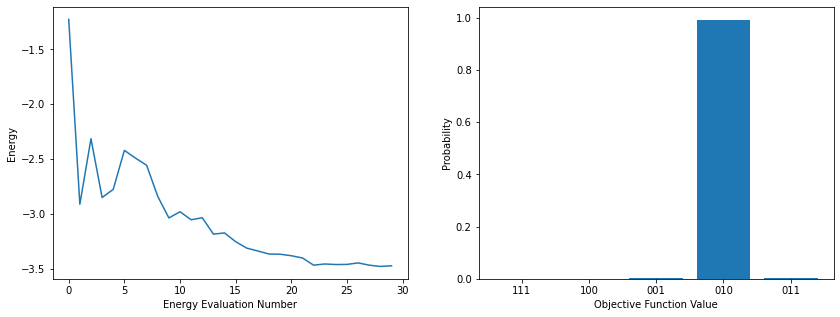

In [34]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(history['fvals'])
axs[1].bar(list(bitstrings.keys()), list(bitstrings.values()))
axs[0].set_xlabel("Energy Evaluation Number")
axs[0].set_ylabel("Energy")
axs[1].set_xlabel("Objective Function Value")
axs[1].set_ylabel("Probability")

#### From the bitstrings sampled, compute the corresponding objective function value, and then sort

In [35]:
samples = []
for x, probability in bitstrings.items():

    x = list(map(int, x)) # convert bitstring to list
    status = qp.is_feasible(x)
    fval = qp.objective.evaluate(x)

    samples.append((x, fval, probability, status))

sorted_samples = sorted(
    samples,
    key=lambda v: (1-v[3], qp.objective.sense.value * v[1]) # feasible: 0; infeasible: 1
)

print('\nsorted')
for sample in sorted_samples:
    print(sample)


sorted
([0, 1, 0], -2.0, 0.991375, True)
([1, 0, 0], 1.0, 0.000875, True)
([0, 0, 1], 3.0, 0.0045, True)
([0, 1, 1], 3.0, 0.002375, True)
([1, 1, 1], 4.0, 0.000875, True)


#### Get the solution with best objective function value

In [36]:
best = sorted_samples[0]
print('optimal value: {}'.format(best[0]))
print('optimal function value: {}'.format(best[1]))
print('probability of optimal value: {}'.format(best[2]))

optimal value: [0, 1, 0]
optimal function value: -2.0
probability of optimal value: 0.991375
